# Homework 4: FFT Tricks
Evan Varan, lze4

## 0.a Imports

In [1]:
import sys
import scipy as sp
import numpy as np
import matplotlib as mpl
from scipy.fftpack import fft, fftfreq
from scipy import signal

import matplotlib.pyplot as plt
#print(plt.style.available)
plt.style.use('classic')

## 0.b Check Versions, etc

In [72]:
print('Python: \t{:2d}.{:1d}'
      .format(sys.version_info[0], sys.version_info[1]))
print('Matplot:\t',mpl.__version__)
print('Numpy:  \t',np.__version__)
print('SciPy:  \t',sp.__version__)

Python: 	 3.12
Matplot:	 3.8.2
Numpy:  	 1.26.3
SciPy:  	 1.12.0rc2


# 0.c Helper Functions

In [73]:
#Helper functions to compute variables needed for NFFT
def compute_freq_nfft(sample):
    freq = fftfreq(NFFT,1/sample)
    return freq
    
def compute_nfft(sinusoid):
    z = 20.0 * np.log10(np.abs(fft(sinusoid,NFFT) / len(sinusoid)))
    return z

def plot_single_sided_nfft(sinusoid,sample,name, color1, color2):
    plt.magnitude_spectrum(sinusoid,Fs=sample,window=np.ones(sinusoid.shape),pad_to=NFFT,scale='dB',sides='onesided',color=color1,linestyle='-',label=f'{name} built in')
    plt.plot(compute_freq_nfft(sample)[0:NFFT//2], compute_nfft(sinusoid)[0:NFFT//2], color=color2, label=f'{name} comp', linewidth=1)
    
def validate_frequency(frequency,color):
    #Validating frequency by drawing a vertical line
    plt.axvline(x=frequency, color=color, linestyle='--')  
    plt.text(frequency + 1, -150, f'frequency =  {frequency}', verticalalignment='center', color = color)

# 1. Create a time-sampled signal comprised of two sinusoids with slightly different frequencies

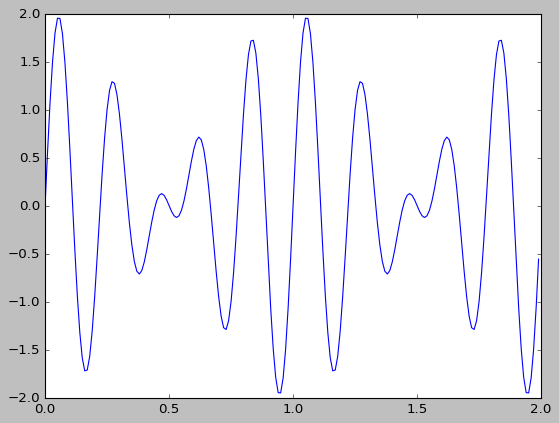

In [74]:
# Frequencies & Length
f1 = 5
f2 = 4
duration = 2.0

# Sampling Rate
Fs = 20 * max(f1,f2)

# Time vector and Sinusoids
t = np.arange(0, duration, 1/Fs)
s1 = np.sin(f1 * 2 * np.pi * t)
s2 = np.sin(f2 * 2 * np.pi * t)

# Add them up
s3 = s1 + s2

plt.plot(t,s3)
plt.show()

# 1.a Estimating the spectrum of the signal using the FFT
No Zero padding, where NFFT = len(sinusoid)

<Figure size 640x480 with 0 Axes>

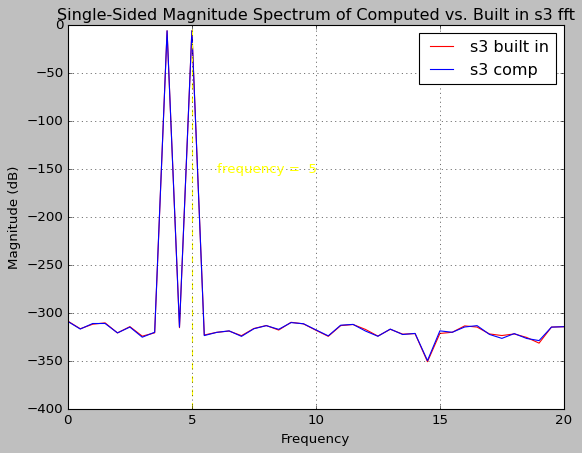

<Figure size 640x480 with 0 Axes>

In [75]:
# Where NFFT = len(s3)
NFFT = len(s3)
plot_single_sided_nfft(s3, Fs,'s3', 'red', 'blue')
validate_frequency(f1,'yellow')
plt.title('Single-Sided Magnitude Spectrum of Computed vs. Built in s3 fft')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

Zero padding 2 times the signal, where NFFT = 2 ** int(np.ceil(np.log2(np.abs(len(sinusoid)*2))))

<Figure size 640x480 with 0 Axes>

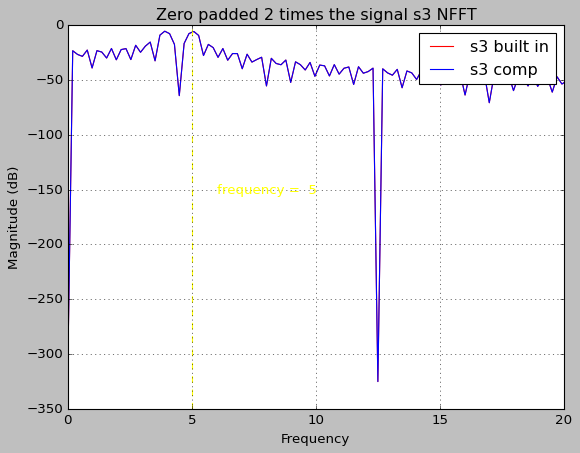

<Figure size 640x480 with 0 Axes>

In [76]:
# Where NFFT = 2 ** int(np.ceil(np.log2(np.abs(len(s3)*2))))
NFFT = 2 ** int(np.ceil(np.log2(np.abs(len(s3)*2))))
plot_single_sided_nfft(s3, Fs,'s3', 'red', 'blue')
validate_frequency(f1,'yellow')
plt.title('Zero padded 2 times the signal s3 NFFT')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

Zero padding 8 times the signal, where NFFT = 2 ** int(np.ceil(np.log2(np.abs(len(sinusoid)*8))))

<Figure size 640x480 with 0 Axes>

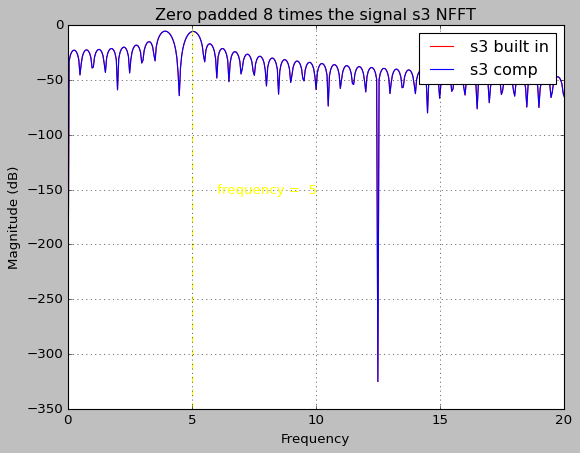

<Figure size 640x480 with 0 Axes>

In [77]:
# Where NFFT = 2 ** int(np.ceil(np.log2(np.abs(len(s3)*2))))
NFFT = 2 ** int(np.ceil(np.log2(np.abs(len(s3)*8))))
plot_single_sided_nfft(s3, Fs,'s3', 'red', 'blue')
validate_frequency(f1,'yellow')
plt.title('Zero padded 8 times the signal s3 NFFT')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

# 2. Manipulating the signal to change the way the FFT estimates its spectrum.


# 2.a  Zero-stuffing

In [78]:
#Helper Functions

def stuff_zeros(sig,numzero,rate):
    duration = (numzero+1) * len(sig) / rate
    time = np.arange(0, duration, 1/rate)
    
    zzz = np.zeros(len(sig))
    zsig = sig
    while (numzero > 0):
       zsig = np.vstack([zsig, zzz])
       numzero = numzero - 1
       sig = zsig.flatten(order='F')
    return sig

def flip_sign(sig):
    # sig is the original signal
    zzz = np.ones(len(sig)//2)
    ooo = -np.ones(len(sig)//2)
    zsig = np.vstack([zzz, ooo])
    zsig = zsig.flatten(order='F')
    sig = np.multiply(sig, zsig)
    return sig
    


    

<Figure size 640x480 with 0 Axes>

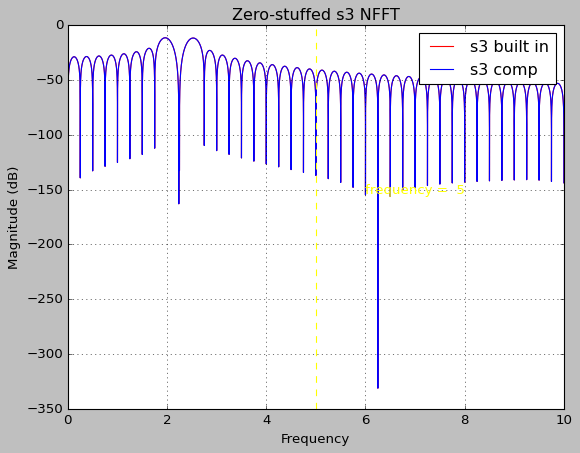

<Figure size 640x480 with 0 Axes>

In [79]:
sig = stuff_zeros(s3,1,Fs)
NFFT = 4 ** int(np.ceil(np.log2(np.abs(len(sig)*8))))
plot_single_sided_nfft(sig, Fs,'s3', 'red', 'blue')
#plot_single_sided_nfft(s3, Fs,'s3', 'red', 'blue')
validate_frequency(f1,'yellow')
plt.title('Zero-stuffed s3 NFFT')
plt.xlim(0,10)
plt.grid()
plt.legend()
plt.figure()

# 2.b Sign-Flipping

<Figure size 640x480 with 0 Axes>

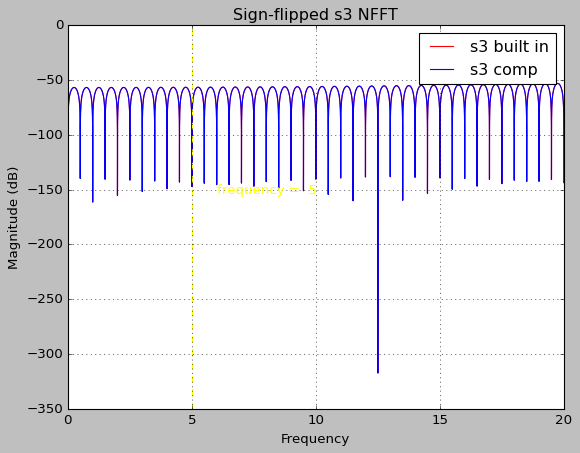

<Figure size 640x480 with 0 Axes>

In [80]:
flip = flip_sign(s3)
NFFT = 4 ** int(np.ceil(np.log2(np.abs(len(flip)*8))))
plot_single_sided_nfft(flip, Fs,'s3', 'red', 'blue')
#plot_single_sided_nfft(s3, Fs,'s3', 'red', 'blue')
validate_frequency(f1,'yellow')
plt.title('Sign-flipped s3 NFFT')
plt.xlim(0,20)
plt.grid()
plt.legend()
plt.figure()

#3. Discussion

1) Why does the spectrum change but the frequency axis stay the same?  Can you "fix" the frequency axis?
    -Changing the value of the nfft variable does not change the frequency as the two are not related. The frequency axis can be scaled up and down to account for the increase in resolution that changing the nfft variable does.
   
2) How does zero-padding improve or affect the spectrum plot?
    -Zero padding is mainly used to increase the resolution of the graph. The graph becomes smoother overall, and allows us to view key points easier.
   
3) What happens if you extend the duration of the signal to many more periods?  Fewer periods?
    -Again, this allows for better resolution of the graph. The only downside of more periods would be the ability to see data close together. This is where fewer periods would shine.
   
4) What happens if you alias the signal on purpose? (e.g. use a sampling rate that's "too small")
    -Aliasing involves overlapping the high frequencies with the low frequencies. With aliasing its always possible to lose data as the data gathered from the frequency could be altered. 
    

